# In this module, you were introduced to the amazing and challenging domain of unsupervised learning; you explored some of the most popular clustering and dimensionality reduction algorithms. Now, it's time for you to apply your unsupervised learning knowledge. In this challenge, you'll work with a dataset of your choice. As always, Kaggle will be one of your best friends. Spend some time on Kaggle and pick a beautiful dataset. Then, using that dataset, do the following:

# * Apply dimensionality reduction techniques to visualize the observations.

# * Apply clustering techniques to group similar observations.

# For each of the tasks above, try several methods and select the best-performing one. Discuss how dimensionality reduction and clustering algorithms enable you to gain insights regarding the data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import umap

from sklearn import datasets, metrics
from scipy.cluster.hierarchy import dendrogram, linkage

import warnings

warnings.filterwarnings('ignore')

# Aerial Bombing Operations in World War II

## * Target, aircraft used, and bombs deployed for every mission in WWII

## * https://www.kaggle.com/usaf/world-war-ii

In [2]:
ops_df = pd.read_csv('data/operations.csv')

In [3]:
ops_df.head()

,Mission ID,Mission Date,Theater of Operations,Country,Air Force,Unit ID,Aircraft Series,Callsign,Mission Type,Takeoff Base,...,Incendiary Devices Weight (Tons),Fragmentation Devices,Fragmentation Devices Type,Fragmentation Devices Weight (Pounds),Fragmentation Devices Weight (Tons),Total Weight (Pounds),Total Weight (Tons),Time Over Target,Bomb Damage Assessment,Source ID
0,1,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN
1,2,8/15/1943,PTO,USA,5 AF,400 BS,B24,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,9366.0
2,3,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN
3,4,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,7.5,NaN,NaN,NaN
4,5,8/15/1943,PTO,USA,5 AF,321 BS,B24,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,22585.0


The dataset needs some preprocessing

In [4]:
ops_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178281 entries, 0 to 178280
Data columns (total 46 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Mission ID                             178281 non-null  int64  
 1   Mission Date                           178281 non-null  object 
 2   Theater of Operations                  175123 non-null  object 
 3   Country                                126494 non-null  object 
 4   Air Force                              126444 non-null  object 
 5   Unit ID                                50913 non-null   object 
 6   Aircraft Series                        178165 non-null  object 
 7   Callsign                               21 non-null      object 
 8   Mission Type                           47186 non-null   object 
 9   Takeoff Base                           3383 non-null    object 
 10  Takeoff Location                       3338 non-null    

In [5]:
ops_df.isna().mean()

Mission ID                               0.000000
Mission Date                             0.000000
Theater of Operations                    0.017714
Country                                  0.290480
Air Force                                0.290760
Unit ID                                  0.714423
Aircraft Series                          0.000651
Callsign                                 0.999882
Mission Type                             0.735328
Takeoff Base                             0.981024
Takeoff Location                         0.981277
Takeoff Latitude                         0.983279
Takeoff Longitude                        0.983285
Target ID                                0.285364
Target Country                           0.003360
Target City                              0.012693
Target Type                              0.178993
Target Industry                          0.290564
Target Priority                          0.244339
Target Latitude                          0.048889


In [6]:
features = ['Target Country'
            ,'Target City'
            ,'Target Type'
            ,'Target Priority'
            ,'High Explosives'
           ]
target = ['Mission Date']

model_df = ops_df[features].join(ops_df[target])
model_df = model_df.dropna()

In [7]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31551 entries, 1 to 178280
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Target Country   31551 non-null  object 
 1   Target City      31551 non-null  object 
 2   Target Type      31551 non-null  object 
 3   Target Priority  31551 non-null  object 
 4   High Explosives  31551 non-null  float64
 5   Mission Date     31551 non-null  object 
dtypes: float64(1), object(5)
memory usage: 1.7+ MB


In [8]:
model_df["Target Country"] = model_df["Target Country"].astype("category").cat.codes
model_df["Target City"] = model_df["Target City"].astype("category").cat.codes
model_df["Target Type"] = model_df["Target Type"].astype("category").cat.codes
model_df["Target Priority"] = model_df["Target Priority"].astype("category").cat.codes

In [9]:
model_df['year'] = pd.DatetimeIndex(model_df['Mission Date']).strftime('%Y%m')
model_df = model_df.drop(columns=['Mission Date'])

In [10]:
model_df['year'] = model_df['year'].astype(int)

# K-means analysis

In [23]:
sample = model_df.sample(10000, axis=0, random_state=66)
sample

,Target Country,Target City,Target Type,Target Priority,High Explosives,year
96448,29,2011,41,1,26.0,194411
156706,2,1239,41,1,280.0,194501
16509,1,1644,41,1,84.0,194401
22995,5,3579,129,1,20.0,194408
30580,27,3502,1434,1,16.0,194408
...,...,...,...,...,...,...
140327,2,395,467,8,4.0,194507
59406,2,2484,41,2,8.0,194504
145287,15,3064,1443,3,6.0,194507
93792,29,2179,1434,1,20.0,194504


In [50]:
X = sample[features]
y = sample['year']

In [51]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

Adjusted Rand Index: 0.0035589558329631094
The silhoutte score: 0.02766474320683576


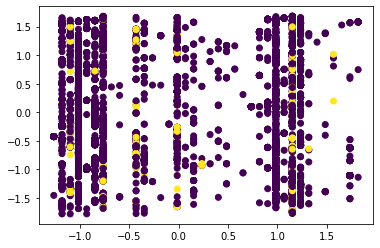

Adjusted Rand Index: 0.00808601745673085
The silhoutte score: -0.021451493022792995


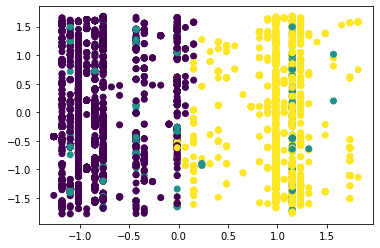

Adjusted Rand Index: 0.00810092355730975
The silhoutte score: -0.02123729792317286


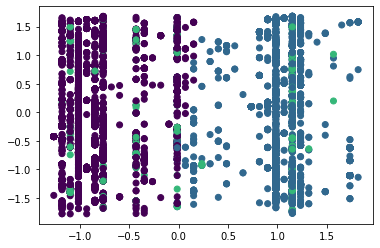

In [52]:
for k in range(2, 5):
    k_means = KMeans(n_clusters=k, random_state=66)
    k_means.fit(X_std)
    y_pred = k_means.predict(X_std)
    print("Adjusted Rand Index: {}".format(metrics.adjusted_rand_score(y, y_pred)))
    print("The silhoutte score: {}".format(metrics.silhouette_score(X, y_pred, metric='euclidean')))
    
    plt.scatter(X_std[:,0], X_std[:,1], c=y_pred)
    plt.show()

# Heriarchical

In [29]:
sample = model_df.sample(500, axis=0, random_state=66)
sample

,Target Country,Target City,Target Type,Target Priority,High Explosives,year
96448,29,2011,41,1,26.0,194411
156706,2,1239,41,1,280.0,194501
16509,1,1644,41,1,84.0,194401
22995,5,3579,129,1,20.0,194408
30580,27,3502,1434,1,16.0,194408
...,...,...,...,...,...,...
12509,5,1623,41,1,28.0,194408
94791,27,1328,905,1,20.0,194411
133266,29,2552,359,8,32.0,194506
79477,29,181,1174,1,6.0,194410


In [30]:
X = sample[features]
y = sample['year']

In [31]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

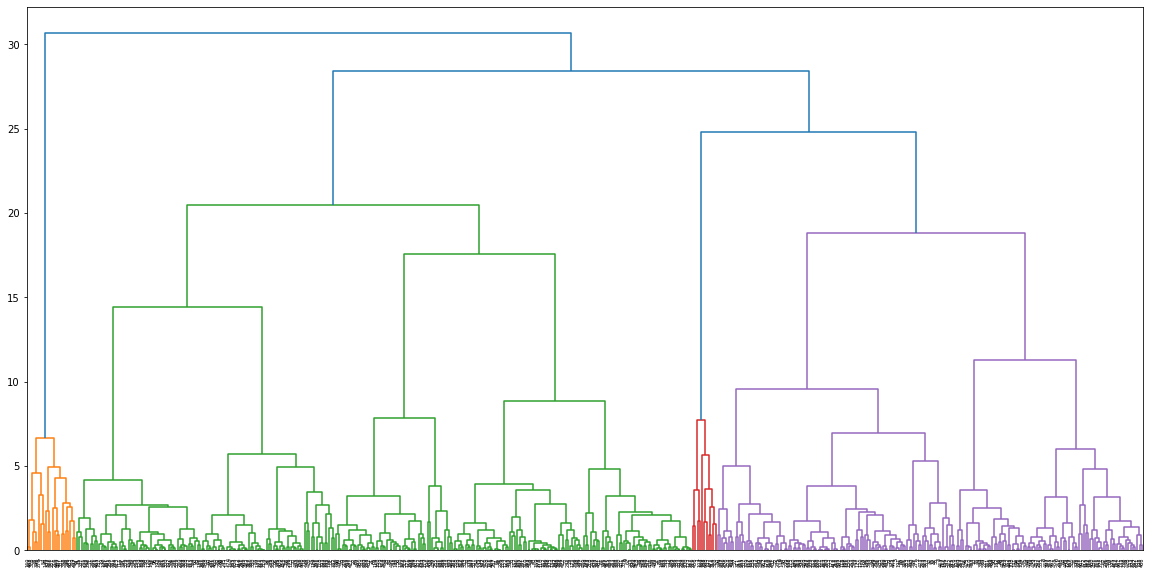

In [32]:
plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='ward'))
plt.show()

# DBSCAN

In [37]:
sample = model_df.sample(10000, axis=0, random_state=66)

,Target Country,Target City,Target Type,Target Priority,High Explosives,year
96448,29,2011,41,1,26.0,194411
156706,2,1239,41,1,280.0,194501
16509,1,1644,41,1,84.0,194401
22995,5,3579,129,1,20.0,194408
30580,27,3502,1434,1,16.0,194408
...,...,...,...,...,...,...
140327,2,395,467,8,4.0,194507
59406,2,2484,41,2,8.0,194504
145287,15,3064,1443,3,6.0,194507
93792,29,2179,1434,1,20.0,194504


In [38]:
X = sample[features]
y = sample['year']

In [39]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [40]:
for i in range(1, 4):
    dbscan_cluster = DBSCAN(eps=1, min_samples=i, metric='euclidean')
    clusters = dbscan_cluster.fit_predict(X_std)
    print(metrics.silhouette_score(X, clusters))
    print(metrics.adjusted_rand_score(y, clusters))

-0.6096134581939153
0.003546873011812884
-0.4369871449620984
0.003547384068727451
-0.1421433564749225
0.003548093548913898


# Gaussian (GMM)

In [41]:
sample = model_df.sample(10000, axis=0, random_state=66)
sample

,Target Country,Target City,Target Type,Target Priority,High Explosives,year
96448,29,2011,41,1,26.0,194411
156706,2,1239,41,1,280.0,194501
16509,1,1644,41,1,84.0,194401
22995,5,3579,129,1,20.0,194408
30580,27,3502,1434,1,16.0,194408
...,...,...,...,...,...,...
140327,2,395,467,8,4.0,194507
59406,2,2484,41,2,8.0,194504
145287,15,3064,1443,3,6.0,194507
93792,29,2179,1434,1,20.0,194504


In [42]:
X = sample[features]
y = sample['year']

In [43]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [44]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=2, random_state=66)

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

In [45]:
print("The silhoutte score of the GMM solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))
print("Adjusted Rand Index of the GMM solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))

The silhoutte score of the GMM solution: 0.23366190011435983
Adjusted Rand Index of the GMM solution: 0.0063193764522673675


In [46]:
types = ['full', 'tied', 'diag', 'spherical']
sils = []
aris = []

In [47]:
for typ in types:
    gmm_cluster = GaussianMixture(n_components=2, covariance_type=typ, random_state=66)

    # Fit model
    clusters = gmm_cluster.fit_predict(X_std)
    aris.append([metrics.adjusted_rand_score(y, clusters), typ])
    sils.append([metrics.silhouette_score(X_std, clusters, metric='euclidean'), typ])

In [48]:
sils.sort(reverse=True)
aris.sort(reverse=True)

In [49]:
print('Best silhouette score: ' + str(sils[0]))
print('Best ARI score: ' + str(aris[0]))

Best silhouette score: [0.2731873864991124, 'tied']
Best ARI score: [0.006363889195806141, 'diag']


# PCA

In [ ]:
sample = model_df.sample(5000, random_state=66)
sample

In [ ]:
X = sample[features]

y = (sample["year"].astype("category").cat.codes / 4).astype(int)
y = y.tolist()

In [ ]:
pca = PCA(n_components=2)

pca_X = pca.fit_transform(X_std)

In [ ]:
plt.figure(figsize=(10,8))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(len(pca_X)):
    plt.text(pca_X[i, 0], pca_X[i, 1], str(y[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 40}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

# t-SNE

In [ ]:
sample = model_df.sample(2000, random_state=66)
sample

In [ ]:
X = sample[features]

y = (sample["year"].astype("category").cat.codes / 4).astype(int)
y = y.tolist()

In [ ]:
for perp in range(100, 101):
    tsne = TSNE(n_components=2, verbose=1, perplexity=perp, n_iter=300)
    tsne_components = tsne.fit_transform(X)
    
    plt.figure(figsize=(10,5))
    colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
    for i in range(tsne_components.shape[0]):
        plt.text(tsne_components[i, 0], tsne_components[i, 1], str(y[i]),
                 color=colours[int(y[i])],
                 fontdict={'weight': 'bold', 'size': 50}
            )

    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.title('perplexity = ' + str(perp))
    plt.show()

# UMAP

In [ ]:
sample = model_df.sample(5000, random_state=66)
sample

In [ ]:
X = sample[features]

y = (sample["year"].astype("category").cat.codes / 4).astype(int)
y = y.tolist()

In [ ]:
umap_results = umap.UMAP(n_neighbors=20,
                          min_dist=0.3,
                          metric='correlation').fit_transform(X)

In [ ]:
plt.figure(figsize=(10, 5))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(umap_results.shape[0]):
    plt.text(umap_results[i, 0], umap_results[i, 1], str(y[i]),
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()